<a href="https://colab.research.google.com/github/count-im/test/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
#데이터 처리 라이브러리 셋팅
import pandas as pd

In [ ]:
#2
#데이터 로딩
train_path = "train.csv"
test_path  = "test.csv"
sub_path   = "sample_submission.csv"

In [ ]:
#3
#데이터 정의
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)
sub   = pd.read_csv(sub_path)

In [ ]:
#4
#데이터 구조 파악
print("train:", train.shape)
print("test :", test.shape)
print("sub  :", sub.shape)

train: (8693, 14)
test : (4277, 13)
sub  : (4277, 2)


In [ ]:
#5
#train 데이터 칼럼 분석
print("\n[train columns]")
print(train.columns.tolist())


[train columns]
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [ ]:
#6
#test 데이터 칼럼 분석
print("\n[test columns]")
print(test.columns.tolist())


[test columns]
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


In [ ]:
#7
#결측치가 있는 칼럼 분류
display(train.info())
display(train.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,9280_02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


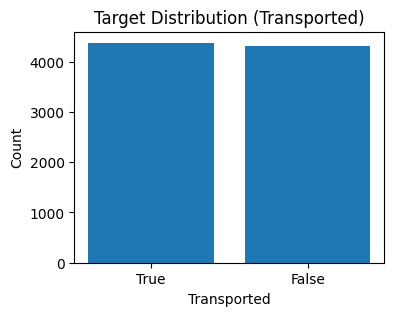

In [ ]:
#7.5
#차원 전송된 승객 칼럼 시각화 : 타겟 과녁 맞추기!!
import matplotlib.pyplot as plt

vc = train['Transported'].value_counts()
plt.figure(figsize=(4,3))
plt.bar(vc.index.astype(str), vc.values)
plt.title("Target Distribution (Transported)")
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()

In [ ]:
#8
#타겟 칼럼인 Transported(다른 차원 전송)의 T/F 분류
train['Transported'].value_counts(normalize=True)

,proportion
Transported,
True,0.503624
False,0.496376


In [ ]:
#9
#train에서 결측치가 많은 칼럼 소팅
missing = train.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
missing

,0
CryoSleep,0.024963
ShoppingMall,0.023927
VIP,0.023352
HomePlanet,0.023122
Name,0.023007
Cabin,0.022892
VRDeck,0.021627
Spa,0.021051
FoodCourt,0.021051
Destination,0.020936


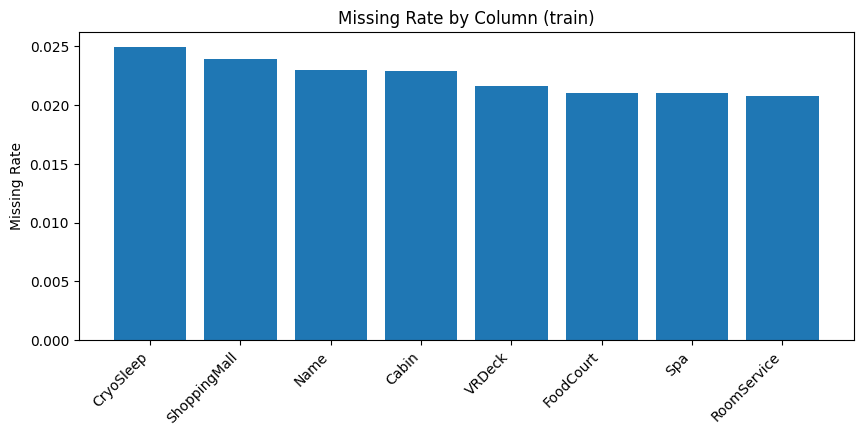

In [ ]:
#9.5
#칼럼별 결측치 바그래프로 비교분석!!
import matplotlib.pyplot as plt

missing = train.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10,4))
plt.bar(missing.index, missing.values)
plt.title("Missing Rate by Column (train)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing Rate")
plt.show()

타겟: Transported
식별자: PassengerId
범주형: HomePlanet, CryoSleep, Cabin, Destination, VIP
수치형: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [ ]:
#10
#냉동수면 상태인 승객들 중 결측치 채우기
#냉동수면 상태인 승객들은 자느라 선상 소비가 없을 것이라 가설
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train.groupby('CryoSleep')[spend_cols].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,350.146772,713.004316,270.586504,486.09294,475.716165
True,0.000000,0.000000,0.000000,0.00000,0.000000


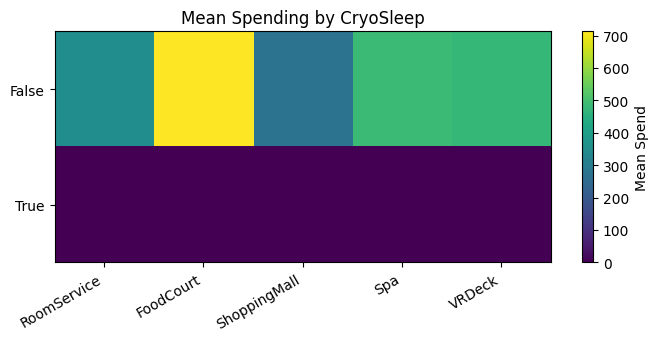

In [ ]:
#10.5
#냉동수면 상태에선 쳐자느라 돈 못 쓴다를 시각화 비교!!
import matplotlib.pyplot as plt

spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
means = train.groupby('CryoSleep')[spend_cols].mean()

plt.figure(figsize=(8,3))
plt.imshow(means.values, aspect='auto')
plt.xticks(range(len(spend_cols)), spend_cols, rotation=30, ha='right')
plt.yticks(range(means.shape[0]), means.index.astype(str))
plt.colorbar(label="Mean Spend")
plt.title("Mean Spending by CryoSleep")
plt.show()

In [ ]:
#11
#냉동수면 상태=선상 소비 없는 승객이 차원 이동됐을 가능성 분석
train['TotalSpend'] = train[spend_cols].sum(axis=1)
test['TotalSpend']  = test[spend_cols].sum(axis=1)

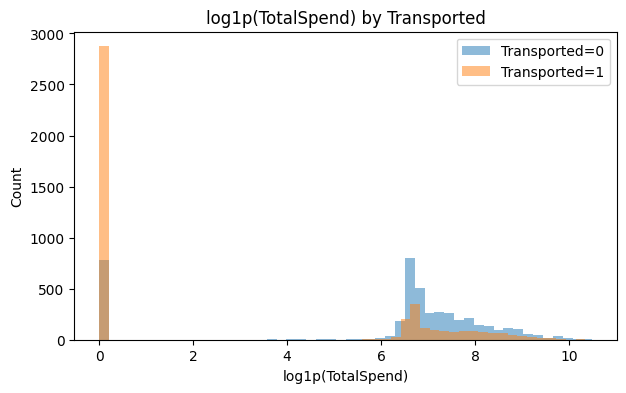

In [ ]:
#11.5
#돈 안 쓰면 차원 이동 당한다!! 소비만이 살 길이다!!
import matplotlib.pyplot as plt
import numpy as np

x0 = np.log1p(train.loc[train['Transported']==0, 'TotalSpend'])
x1 = np.log1p(train.loc[train['Transported']==1, 'TotalSpend'])

plt.figure(figsize=(7,4))
plt.hist(x0, bins=50, alpha=0.5, label='Transported=0')
plt.hist(x1, bins=50, alpha=0.5, label='Transported=1')
plt.title("log1p(TotalSpend) by Transported")
plt.xlabel("log1p(TotalSpend)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
#12
#승객의 객실 위치로 사고 지점과 차원 이동의 상관 관계 파악
#Cabin : Deck/Number/Side
def split_cabin(df):
    df['Deck'] = df['Cabin'].str.split('/').str[0]
    df['Side'] = df['Cabin'].str.split('/').str[2]
    return df

train = split_cabin(train)
test  = split_cabin(test)

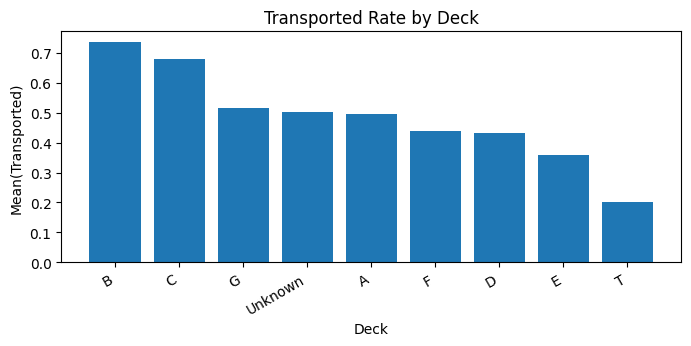

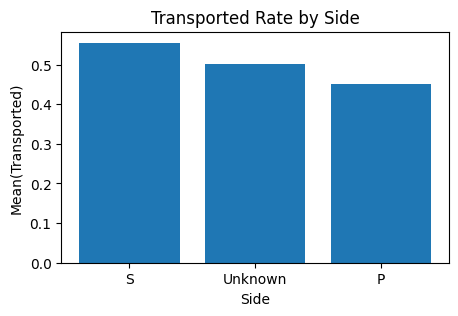

In [ ]:
#12.5
#객실 위치에 따라 차원 이동이 됐는지?
import matplotlib.pyplot as plt

deck_rate = train.groupby('Deck')['Transported'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,3))
plt.bar(deck_rate.index.astype(str), deck_rate.values)
plt.title("Transported Rate by Deck")
plt.xlabel("Deck")
plt.ylabel("Mean(Transported)")
plt.xticks(rotation=30, ha='right')
plt.show()

side_rate = train.groupby('Side')['Transported'].mean().sort_values(ascending=False)
plt.figure(figsize=(5,3))
plt.bar(side_rate.index.astype(str), side_rate.values)
plt.title("Transported Rate by Side")
plt.xlabel("Side")
plt.ylabel("Mean(Transported)")
plt.show()

In [ ]:
#13
#승객 나이를 중앙값으로 분석
age_median = train['Age'].median()

train['Age'] = train['Age'].fillna(age_median)
test['Age']  = test['Age'].fillna(age_median)

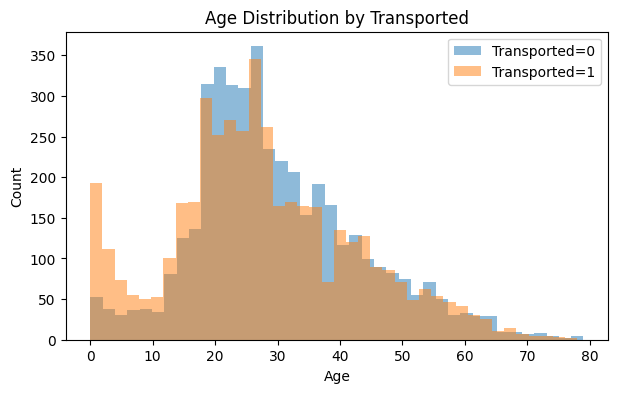

In [ ]:
#13.5
#나이에 따라 차원 이동이 됐는지?
import matplotlib.pyplot as plt

a0 = train.loc[train['Transported']==0, 'Age']
a1 = train.loc[train['Transported']==1, 'Age']

plt.figure(figsize=(7,4))
plt.hist(a0, bins=40, alpha=0.5, label='Transported=0')
plt.hist(a1, bins=40, alpha=0.5, label='Transported=1')
plt.title("Age Distribution by Transported")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
#14
#범주형 칼럼의 결측치는 Unknow으로 처리 저장
cat_cols = ['HomePlanet', 'Destination', 'VIP', 'Deck', 'Side']

for col in cat_cols:
    train[col] = train[col].fillna('Unknown')
    test[col]  = test[col].fillna('Unknown')

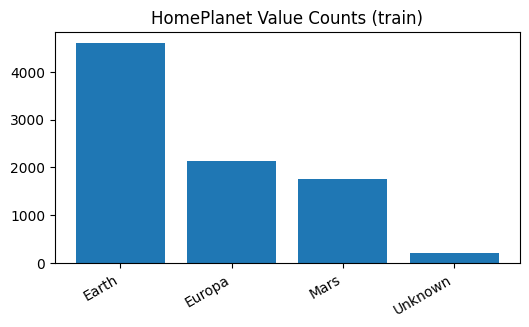

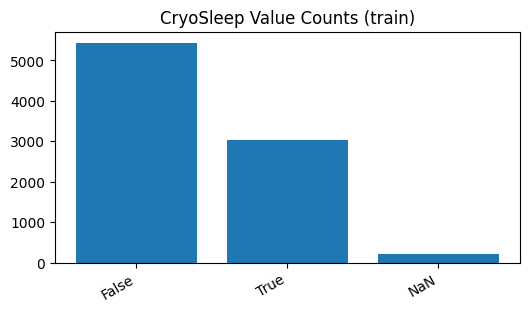

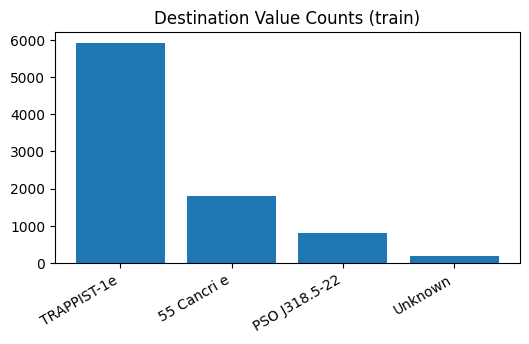

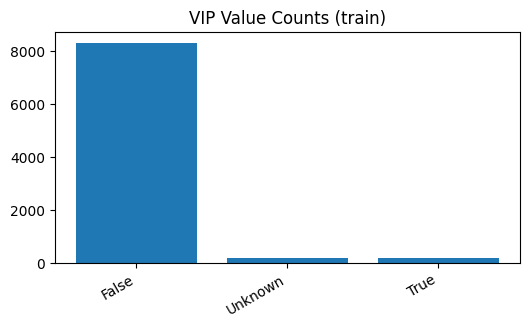

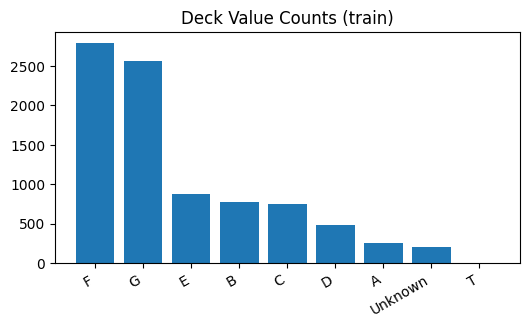

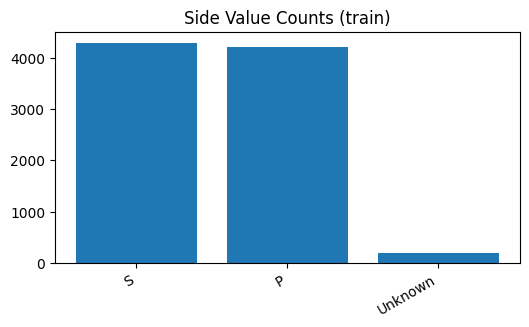

In [ ]:
#14.5
#출신행성, 냉동수면, 목적지, VIP, 객실 위치별 승객을 한 눈에 분류!!
import matplotlib.pyplot as plt

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

for col in cat_cols:
    vc = train[col].fillna('NaN').value_counts()
    plt.figure(figsize=(6,3))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"{col} Value Counts (train)")
    plt.xticks(rotation=30, ha='right')
    plt.show()

In [ ]:
#15
#타겟은 차원 이동한 승객들 예측
target = 'Transported'

In [ ]:
#16
#train 데이터에서 식별자, 이름, 객실 제거
drop_cols = ['PassengerId', 'Name', 'Cabin']
features = [c for c in train.columns if c not in drop_cols + [target]]

In [ ]:
#17
#y=wx+b에서 x를 넣어서 y가 나오나?
X = train[features]
y = train[target]

X_test = test[features]

In [ ]:
#18
#원핫인코딩으로 train와 test 칼럼 정렬
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# train/test 컬럼 정렬
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

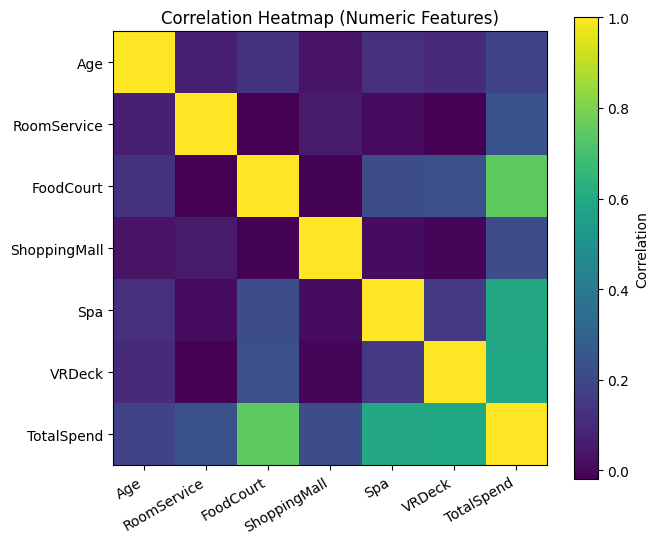

In [ ]:
#18.5
#히트맵으로 상관 관계를 한 눈에!!
import matplotlib.pyplot as plt

num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']
corr = train[num_cols].corr()

plt.figure(figsize=(7,6))
plt.imshow(corr.values)
plt.xticks(range(len(num_cols)), num_cols, rotation=30, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
#19
#사이킷런 데이터 분류 모듈로 train과 test 분리
#test size는 우선 0.2
#random state는 은하수를 여행하는 히치하이커
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
#20
#1차 시도
#사이킷런의 LogisticRegression 회귀 모델(로지스틱) 활용
#사이킷런의 accuracy score 모듈 활용
#모델은 우선 1000번 돌리기
#acc 찾기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# spend_cols (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)의 NaN 값 처리
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in spend_cols:
    if col in X_train.columns:
        median_val = X_train[col].median() # X_train의 중앙값으로 결측치 채우기
        X_train[col] = X_train[col].fillna(median_val)
        X_valid[col] = X_valid[col].fillna(median_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)

acc

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7906843013225991

In [ ]:
#21
#2차 시도
#이번엔 원핫인코딩 대신 스탠다드스케일러로 데이터 피처를 평균 빼고 표준편차로 나누는 방식으로 인코딩
#그래도 acc는 도긴개긴
#로지스틱 모델은 냉동수면과 소비와 객실위치 같은 특정 칼럼에 따라 예측값이 크게 달라지는 비선형 데이터에선 정확도 개선에 한계
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # sparse(one-hot) 대응
    ("clf", LogisticRegression(max_iter=3000))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc

0.7924094307073031

In [ ]:
#21
#3차 시도
#이번엔 로지스틱 대신 디시전 트리 모델을 쓴다
#디지전 트리 모델을 앙상블로 쓴다
#앙상블을 부스팅 방식으로 쓴다
#HistGradientBoostingClassifier(디시전 트리 모델)로 대규모, 속도, Nan까지 처리
#if=else 규칙을 쓰는 디시즌 트리 모델로 T/F를 연산해서 분기에서만 정확도를 높임
#기존 acc와 달리 부스팅한 acc_gb
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = HistGradientBoostingClassifier(
    max_depth=None,
    learning_rate=0.05,
    max_iter=500,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
acc_gb = accuracy_score(y_valid, y_pred)
acc_gb


0.8113858539390454

In [ ]:
#22
#gb로 찾은 예측값 저장
test_pred = gb.predict(X_test)
test_pred[:10], test_pred.dtype, test_pred.shape

(array([ True, False,  True,  True,  True, False,  True,  True,  True,
        False]),
 dtype('bool'),
 (4277,))

In [ ]:
#24
submission = sub.copy()
submission['Transported'] = test_pred

submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
#25
submission.to_csv("submission_sleep.csv", index=False)
print("saved:", "submission_sleep.csv", "rows:", len(submission))

saved: submission_sleep.csv rows: 4277


In [9]:
#26
#4차 시도: Feature Engineering + Pipeline + CV 기반 튜닝 (public 0.80+ 목표)

import numpy as np
import pandas as pd

#다시 로딩
train_path = "train.csv"
test_path  = "test.csv"
sub_path   = "sample_submission.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)
sub   = pd.read_csv(sub_path)

#도구 장착
#StratifiedKFold : 데이터를 뱃칭해서 교차 검증하는 역할
#RandomizedSearchCV : 하이퍼파라미터 조합을 랜덤하게 시도해서 평균 내줌
#ColumnTransformer : 칼럼별로 범주형과 수치형 전처리를 각각 알아서 해줌
#Pipeline : 전처리와 모델 학습을 한 번에!!
#OneHotEncoder : 숫자 벡터로!!
#SimpleImputer : NaN을 자동 채워준다!!
#ccuracy_score : 정확도 측정!!
#HistGradientBoostingClassifier : 부스팅 트리


from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier

#원본(train/test)에서 feature engineering을 동일하게 적용해야 하므로,
#전처리 전에 합쳐서 가공한 뒤 다시 분리
train_raw = train.copy()
test_raw  = test.copy()

train_raw["is_train"] = 1
test_raw["is_train"]  = 0
test_raw["Transported"] = np.nan

all_df = pd.concat([train_raw, test_raw], axis=0, ignore_index=True)

# --- Feature Engineering ---

#객실 위치의 Deck/Number/Side를 분해
cabin_split = all_df["Cabin"].astype("string").str.split("/", expand=True)
all_df["CabinDeck"] = cabin_split[0]
all_df["CabinNum"]  = pd.to_numeric(cabin_split[1], errors="coerce")
all_df["CabinSide"] = cabin_split[2]

#승객ID를 그룹핑해서 그룹ID로 묶어서 새로운 칼럼 구축
pid_split = all_df["PassengerId"].astype("string").str.split("_", expand=True)
all_df["GroupId"] = pid_split[0]

#그룹 사이즈 계산
group_sizes = all_df.groupby("GroupId")["PassengerId"].transform("count")
all_df["GroupSize"] = group_sizes

#돈 쓰고 안 쓰고
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for c in spend_cols:
    all_df[c] = pd.to_numeric(all_df[c], errors="coerce")

all_df["TotalSpend"] = all_df[spend_cols].sum(axis=1, skipna=True)
all_df["NoSpend"] = (all_df["TotalSpend"].fillna(0) == 0).astype(int)

#작명소 차릴 거 아니면 이름은 죽고 사는 거에 도움 안 됨
drop_cols = ["Name", "Cabin", "GroupId", "is_train"]
# PassengerId는 제출용 키라 학습에선 제거 (GroupSize는 이미 추출했음)
drop_cols += ["PassengerId"]

#다시 train/test로 분리
train_fe = all_df[all_df["is_train"] == 1].drop(columns=["is_train"])
test_fe  = all_df[all_df["is_train"] == 0].drop(columns=["is_train", "Transported"])

y = train_fe["Transported"].astype(bool)
X = train_fe.drop(columns=["Transported"])

# 불필요 컬럼 제거
X = X.drop(columns=[c for c in drop_cols if c in X.columns])
X_test_final = test_fe.drop(columns=[c for c in drop_cols if c in test_fe.columns])

# 수치/범주 컬럼 자동 분리
num_cols = X.select_dtypes(include=["number"]).columns.tolist() # 'bool' 제거
cat_cols = [c for c in X.columns if c not in num_cols]

# 명시적으로 숫자형을 float, 범주형을 string으로 변환하여 SimpleImputer의 오류를 방지
for col in num_cols:
    X[col] = X[col].astype(float)
    X_test_final[col] = X_test_final[col].astype(float)

for col in cat_cols:
    X[col] = X[col].astype(str)
    X_test_final[col] = X_test_final[col].astype(str)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

#모델 + 하이퍼파라미터 탐색
model = HistGradientBoostingClassifier(random_state=42)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", model)
])

param_dist = {
    "clf__learning_rate": [0.05, 0.1],
    "clf__max_iter": [300, 600],
    "clf__max_leaf_nodes": [31, 63],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring="accuracy",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X, y)

print("Best CV accuracy:", search.best_score_)
print("Best params:", search.best_params_)

best_model = search.best_estimator_

#최종 학습
test_pred = best_model.predict(X_test_final)

submission2 = sub.copy()
submission2["Transported"] = test_pred.astype(bool)

#제출 파일
submission2.to_csv("submission_sleepless.csv", index=False)
print("saved:", "submission_sleepless.csv", "rows:", len(submission2))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best CV accuracy: 0.8049008600553678
Best params: {'clf__max_leaf_nodes': 31, 'clf__max_iter': 300, 'clf__learning_rate': 0.05}
saved: submission_sleepless.csv rows: 4277


# Space Titanic 프로젝트 보고서

---

## 1. 개요 (Overview)

1. 1만3000명 우주 타이타닉 승객 중 어떤 승객이 차원 이동(Transported)됐는지를 예측하는 모델을 만들어야 했다.
2. 지피티 가이드에 따라, EDA를 통해 결측치를 찾고 채우고 훈련 데이터의 칼럼들과 Transported 칼럼의 correlation을 탐색했다.
3-1. 이 프로젝트의 목표는 훈련 데이터를 학습한 모델이
3-2. Transported가 빠진 테스트 테이터에서
3-3. 다른 칼럼들의 속성값만으로 승객별 Transported 여부를 T/F로 예측하게 만드는 것이다.
4. 로지스틱 회귀 모델을 사용했지만 정확도가 0.7 대에서 멈췄다.
5. 지피티의 제안에 따라, 디시전 트리 기반 부스팅 모델을 앙상블로 적용하여 0.8 성능을 개선하였다.

그러나
6. 퍼실님이 구글 코랩에서 나온 정확도 0.8은 validation accuracy여서 실험실 데이터일 뿐이라고 지적.
7. 캐글 테스트에서 public score가 0.8 이상이 나와야 한다고 요청.
8. #26부터 지피티와 함께 테스트.  

---

## 2. 목차 (Table of Contents)

1. 개요  
2. 목차
3. 주석 및 의견
4. 모델링 및 성능 비교  
5. 결과 요약(Summary)  
6. 회고(Reflection)  
7. 참고 자료(Reference)

---

## 3. 주석 및 의견 (Comments & Insights)

1. 지피티의 가이드에 따른 EDA 결과, 냉동수면(CryoSleep) 여부와 소비 패턴(Spa 등)이 Transported와 가장 강한 관계를 보였다.
2. 지피티의 가이드에 따른 EDA 결과, 객실위치(Cabin) 정보를 Deck과 Side로 분해한 결과, 객실 위치에 따른 Transported 비율 차이가 드러났다.
3. 이렇게 특정 칼럼의 속성과 상관 관계가 밀접한 데이터는 로지스틱 선형 모델보다 조건 분기와 변수 간 상호작용을 학습할 수 있는 모델인 디시전 트리 모델을 사용해야 한다고 지피티가 가이드했다.

---

## 4. 결과 요약 (Summary)

1. Logistic Regression 베이스라인 정확도: 약 0.79
2. Gradient Boosting 모델 정확도: 약 0.81
3. 트리 기반 부스팅 모델이 데이터 구조에 더 적합함을 확인하였다.
4. 최종 제출 파일은 `submission_sleep.csv`로 생성하였다.
5. 캐글에 제출했고, Public Score 0.79705가 나왔다.

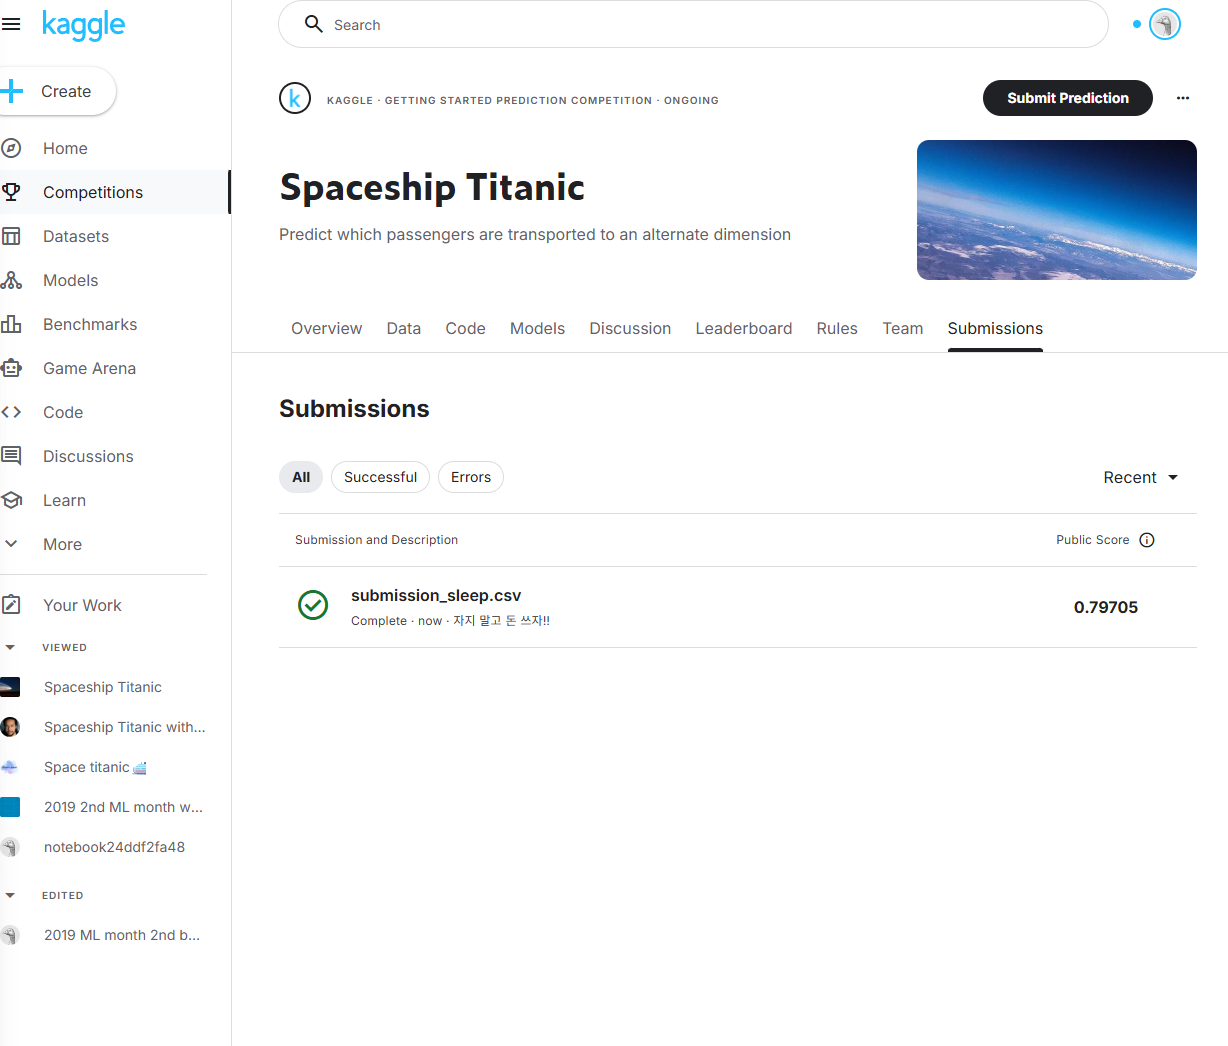

6. 캐글 기준 public score 0.801196이 나왔다.

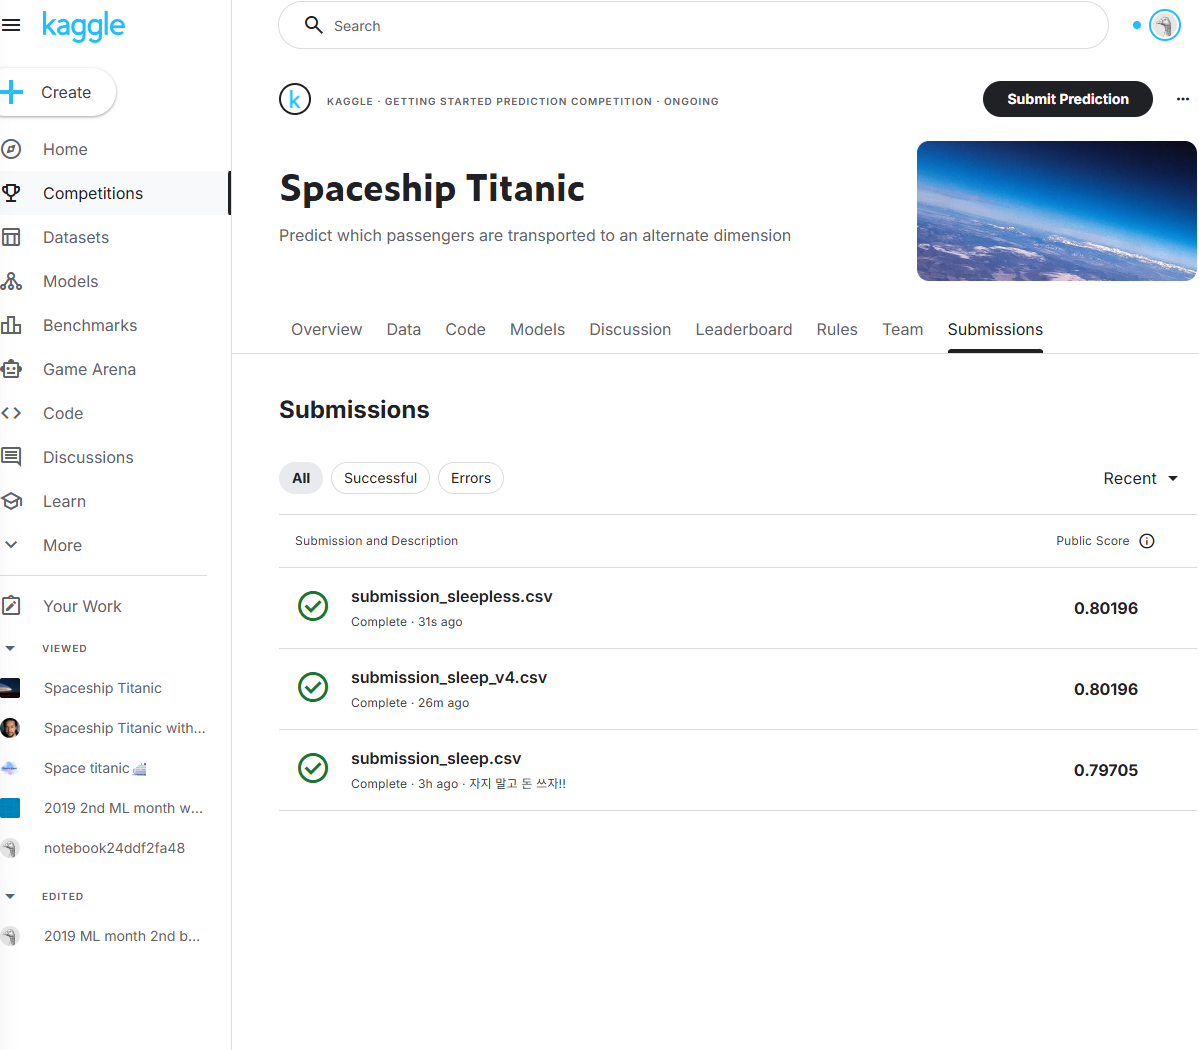

---

## 5. 회고 (Reflection)

1. EDA에는 일종의 순서와 공식이 있는 것 같고 데이터 처리 경험이 중요한 것 같다.
2. EDA와 시각화 코드를 위한 코드는 베이스라인을 쓰든 지피티를 쓰든 복붙 하고 읽어보는 것이 빠른 것 같다.
3. 코드를 읽다보면 절대 직접 쓰진 못해도 독해력이 0.1%씩은 개선되는 것 같다.
4. 이 학습의 진짜 목표는 EDA를 통해 데이터 구조를 이해해서 이런 특성을 가진 데이터에는 이런 모델이 정확도가 올라간다는 것을 학습하는 것인 것 같다.
5. 지피티한테 "데이터가 이런데 이건 어떤 모델을 써야 정확도가 높아질까?"라고 물어볼 줄 알게 됐다.
6. 배우다보면, 지피티한테 안 묻고도 데이터 EDA만 해보면 모델을 딱 선택할 수 있게 될까?

---

## 6. 참고 자료 (Reference)

1. 지피티